<a href="https://colab.research.google.com/github/jihyunjeongme/data-analysis-kaggle/blob/master/%5BKaggle_Titanic%5D_EDA_To_prediction(DieTanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 - EDA To Prediction(DieTanic)
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- https://kaggle-kr.tistory.com/17?category=868316

In [0]:
# 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')
sns.set(font_scale=2.5)
# 위 두줄은 matplotlib의 기본 scheme말고 seavorn scheme을 세팅하고, 
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
# test, traing set 데이터 불러오기

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
cd /content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/Titanic

/content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/Titanic


In [37]:
df_train=pd.read_csv('train.csv')
data.shape

(891, 12)

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df_train.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

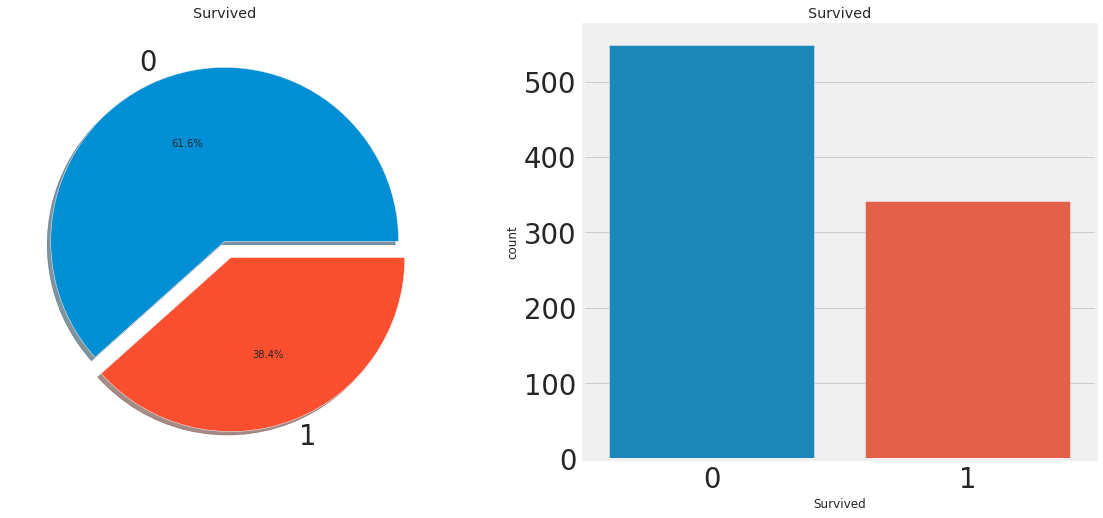

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [0]:
# 1: 살아남음, 0: 죽음
# 38.4% 가 살아남음

In [0]:
# EDA
# Pclass
# categorial(범주형이면서 순서가 있음)

In [44]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [45]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [46]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


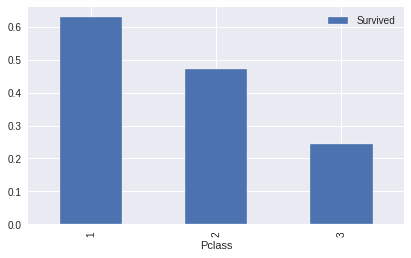

In [51]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [0]:
# 위에 보다 시피 Pclass가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.

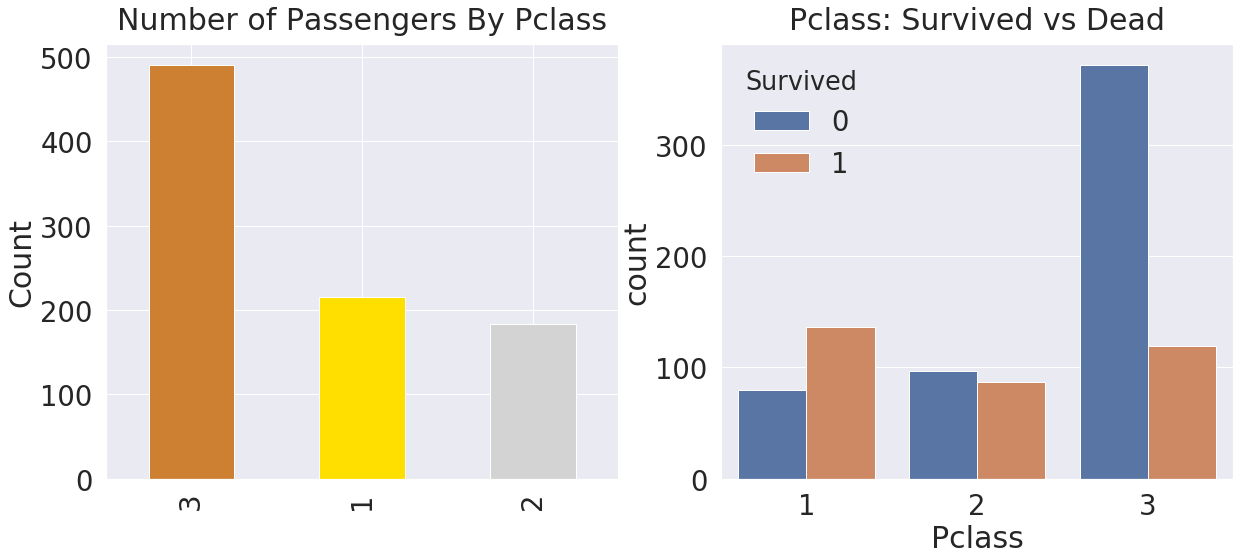

In [56]:
# seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있습니다.

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


In [0]:
# 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 
# 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

In [0]:
# Sex
# 이번에는 성별로 생존률이 어떻게 달라지는지 확인해보겠습니다.
# pandas groupby와 seaborn countplot을 사용하여 시각화해봅시다.

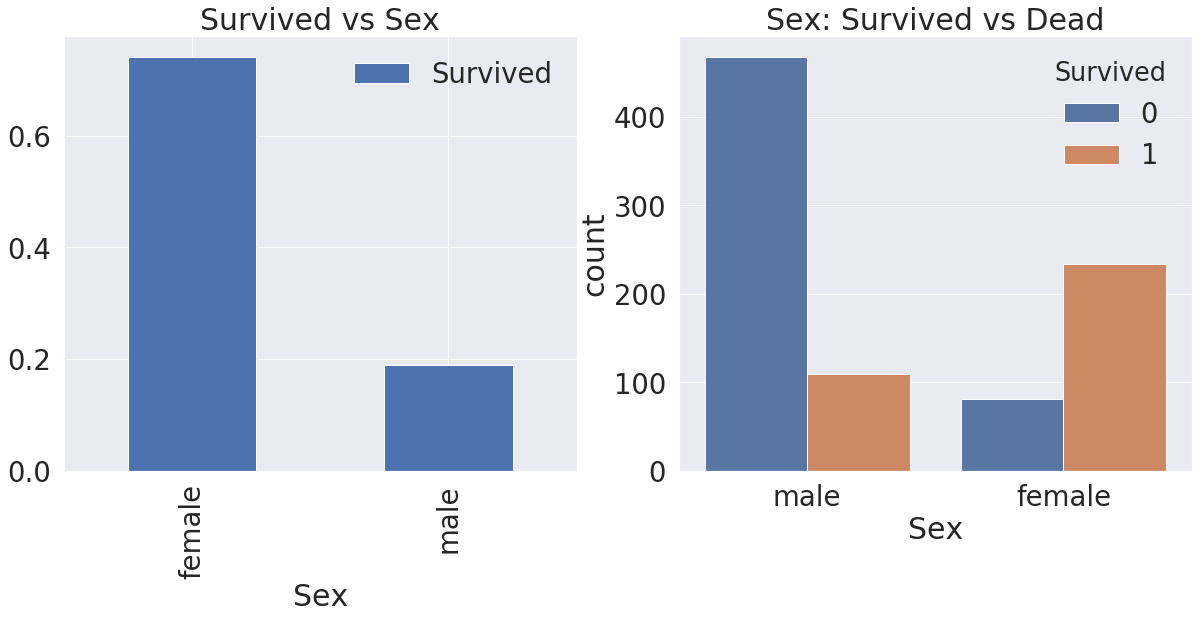

In [64]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].set_title('Survived vs Sex')
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
plt.show()

In [67]:
# 보시다 시피, 여자가 생존할 확률이 높다.

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [68]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [0]:
# Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있음.

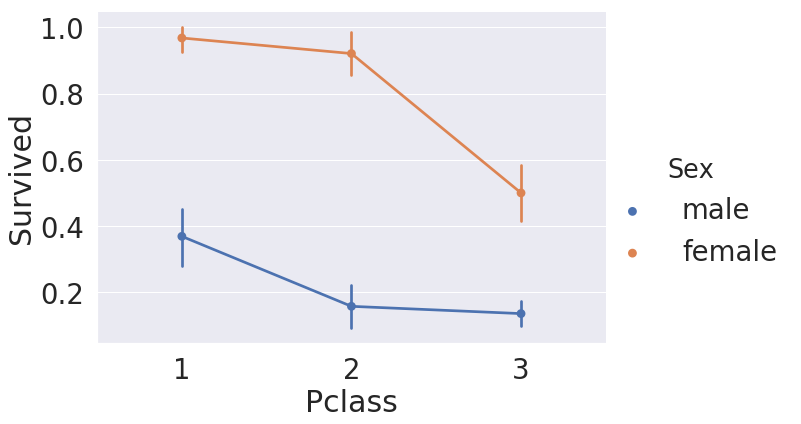

In [70]:
# Both Sex and Pclass
# Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인
# seaborn의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음.

sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

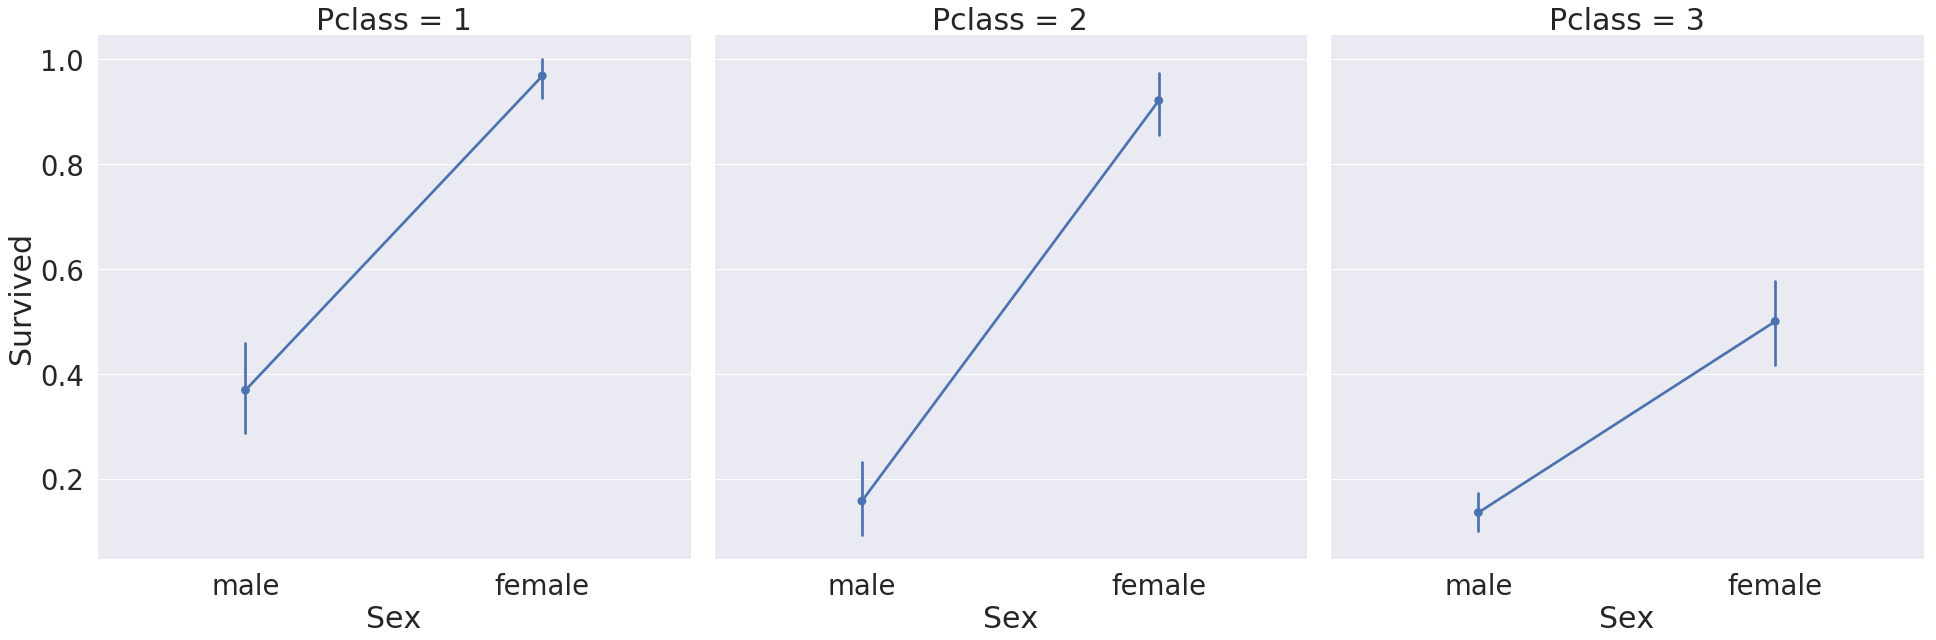

In [72]:
# 모든 클래스에서 female이 살 확률이 male 보다 높은 걸 알 수 있음.
# 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높음.
# 위 그래프는 hue 대신 column으로 하면 아래와 같아짐


sns.factorplot(x='Sex', y='Survived', col='Pclass',data=df_train, satureation=.5,
size=9, aspect=1)
              

In [77]:
# Age
# 이번에는 Age feature를 살펴봅시다.

print("제일 나이 많은 탑승객: {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객: {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


In [0]:
# 생존에 따른 Age의 histogram을 그려보겠습니다.